In [1]:
!apt-get install graphviz libgraphviz-dev


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4
Suggested packages:
  gvfs
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libgvc6-plugins-gtk librsvg2-common libxdot4
0 upgraded, 9 newly installed, 0 to remove and 34 not upgraded.
Need to get 2,434 kB of archives.
After this operation, 7,681 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-common all 2.24.33-2ubuntu2.1 [125 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgtk2.0-0 amd64 2.24.33-2ubuntu2.1 [2,038 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libgail18 

In [2]:
pip install dowhy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.6/192.6 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 43.4 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.12
    Uninstalling Cython-3.0.12:
      Successfully uninstalled Cython-3.0.12


In [3]:
# Import relevant packages
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import patsy
import warnings
import matplotlib.pyplot as plt
import random
import numpy as np
# If you're working with DoWhy, it should now default to pydot for causal graph visualization
import dowhy
from dowhy import CausalModel
import warnings
warnings.simplefilter('ignore')
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV, ElasticNetCV, LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.base import BaseEstimator
import seaborn as sns
random.seed(5)
warnings.simplefilter('ignore')
np.random.seed(1234)

In [4]:
url="https://raw.githubusercontent.com/CausalAIBook/MetricsMLNotebooks/main/data/wage2015_subsample_inference.csv"

In [5]:
df=pd.read_csv(url)

In [6]:
df[['exp1', 'exp2', 'exp3', 'exp4', 'occ', 'occ2', 'ind', 'ind2']].nunique()

,0
exp1,87
exp2,87
exp3,87
exp4,87
occ,351
occ2,22
ind,230
ind2,21


In [7]:
df.describe()

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,we,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000
mean,23.410410,2.970787,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,0.216117,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893
std,21.003016,0.570385,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,0.411635,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019
min,3.021978,1.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000
25%,13.461538,2.599837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000
50%,19.230769,2.956512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000
75%,27.777778,3.324236,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000
max,528.845673,6.270697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000


1. **wage**: Raw wage/salary earnings (likely in dollars per hour or year)
2. **lwage**: Natural logarithm of wage (used in many wage regressions to normalize distribution)
3. **sex**: Gender indicator (typically 1=male, 0=female, but could be reversed)
4. **shs**: Some high school (no diploma) - binary indicator
5. **hsg**: High school graduate - binary indicator
6. **scl**: Some college (no degree) - binary indicator
7. **clg**: College graduate - binary indicator
8. **ad**: Advanced degree (Master's/PhD) - binary indicator
   (Note: shs-hsg-scl-clg-ad are mutually exclusive education categories)
9. **mw**: Midwest region indicator
10. **so**: South region indicator
11. **we**: West region indicator
12. **ne**: Northeast region indicator
    (These are US Census region dummies, with one omitted as reference category)
13. **exp1**: Potential work experience (likely age - education - 6)
14. **exp2**: exp1 squared (experience squared term)
15. **exp3**: exp1 cubed (experience cubed term)
16. **exp4**: exp1 quartic (experience to the 4th power)
    (The exp terms allow for nonlinear experience-wage relationship)
17. **occ**: Occupation code (detailed classification)
18. **occ2**: Broad occupation category (aggregated from occ)
19. **ind**: Industry code (detailed classification)
20. **ind2**: Broad industry category (aggregated from ind)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wage    5150 non-null   float64
 1   lwage   5150 non-null   float64
 2   sex     5150 non-null   int64  
 3   shs     5150 non-null   int64  
 4   hsg     5150 non-null   int64  
 5   scl     5150 non-null   int64  
 6   clg     5150 non-null   int64  
 7   ad      5150 non-null   int64  
 8   mw      5150 non-null   int64  
 9   so      5150 non-null   int64  
 10  we      5150 non-null   int64  
 11  ne      5150 non-null   int64  
 12  exp1    5150 non-null   float64
 13  exp2    5150 non-null   float64
 14  exp3    5150 non-null   float64
 15  exp4    5150 non-null   float64
 16  occ     5150 non-null   float64
 17  occ2    5150 non-null   int64  
 18  ind     5150 non-null   float64
 19  ind2    5150 non-null   int64  
dtypes: float64(8), int64(12)
memory usage: 804.8 KB


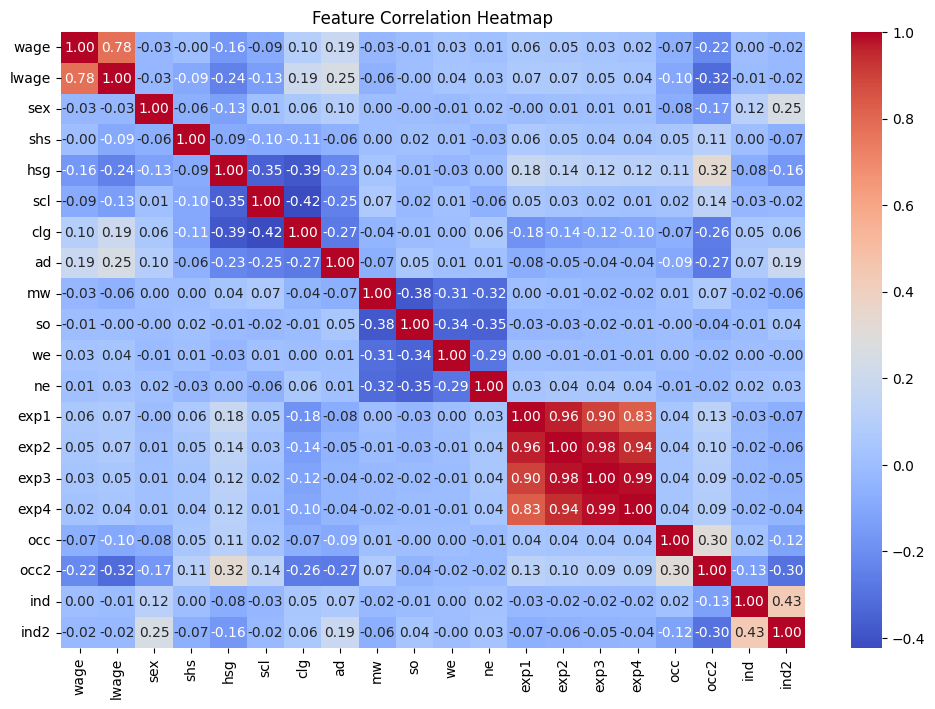

In [9]:
corr_matrix=df.corr()
plt.figure(figsize=(12, 8)) #initialize the figure
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f") #create heatmap with seaborn
plt.title("Feature Correlation Heatmap")  #title
plt.show()  #plot

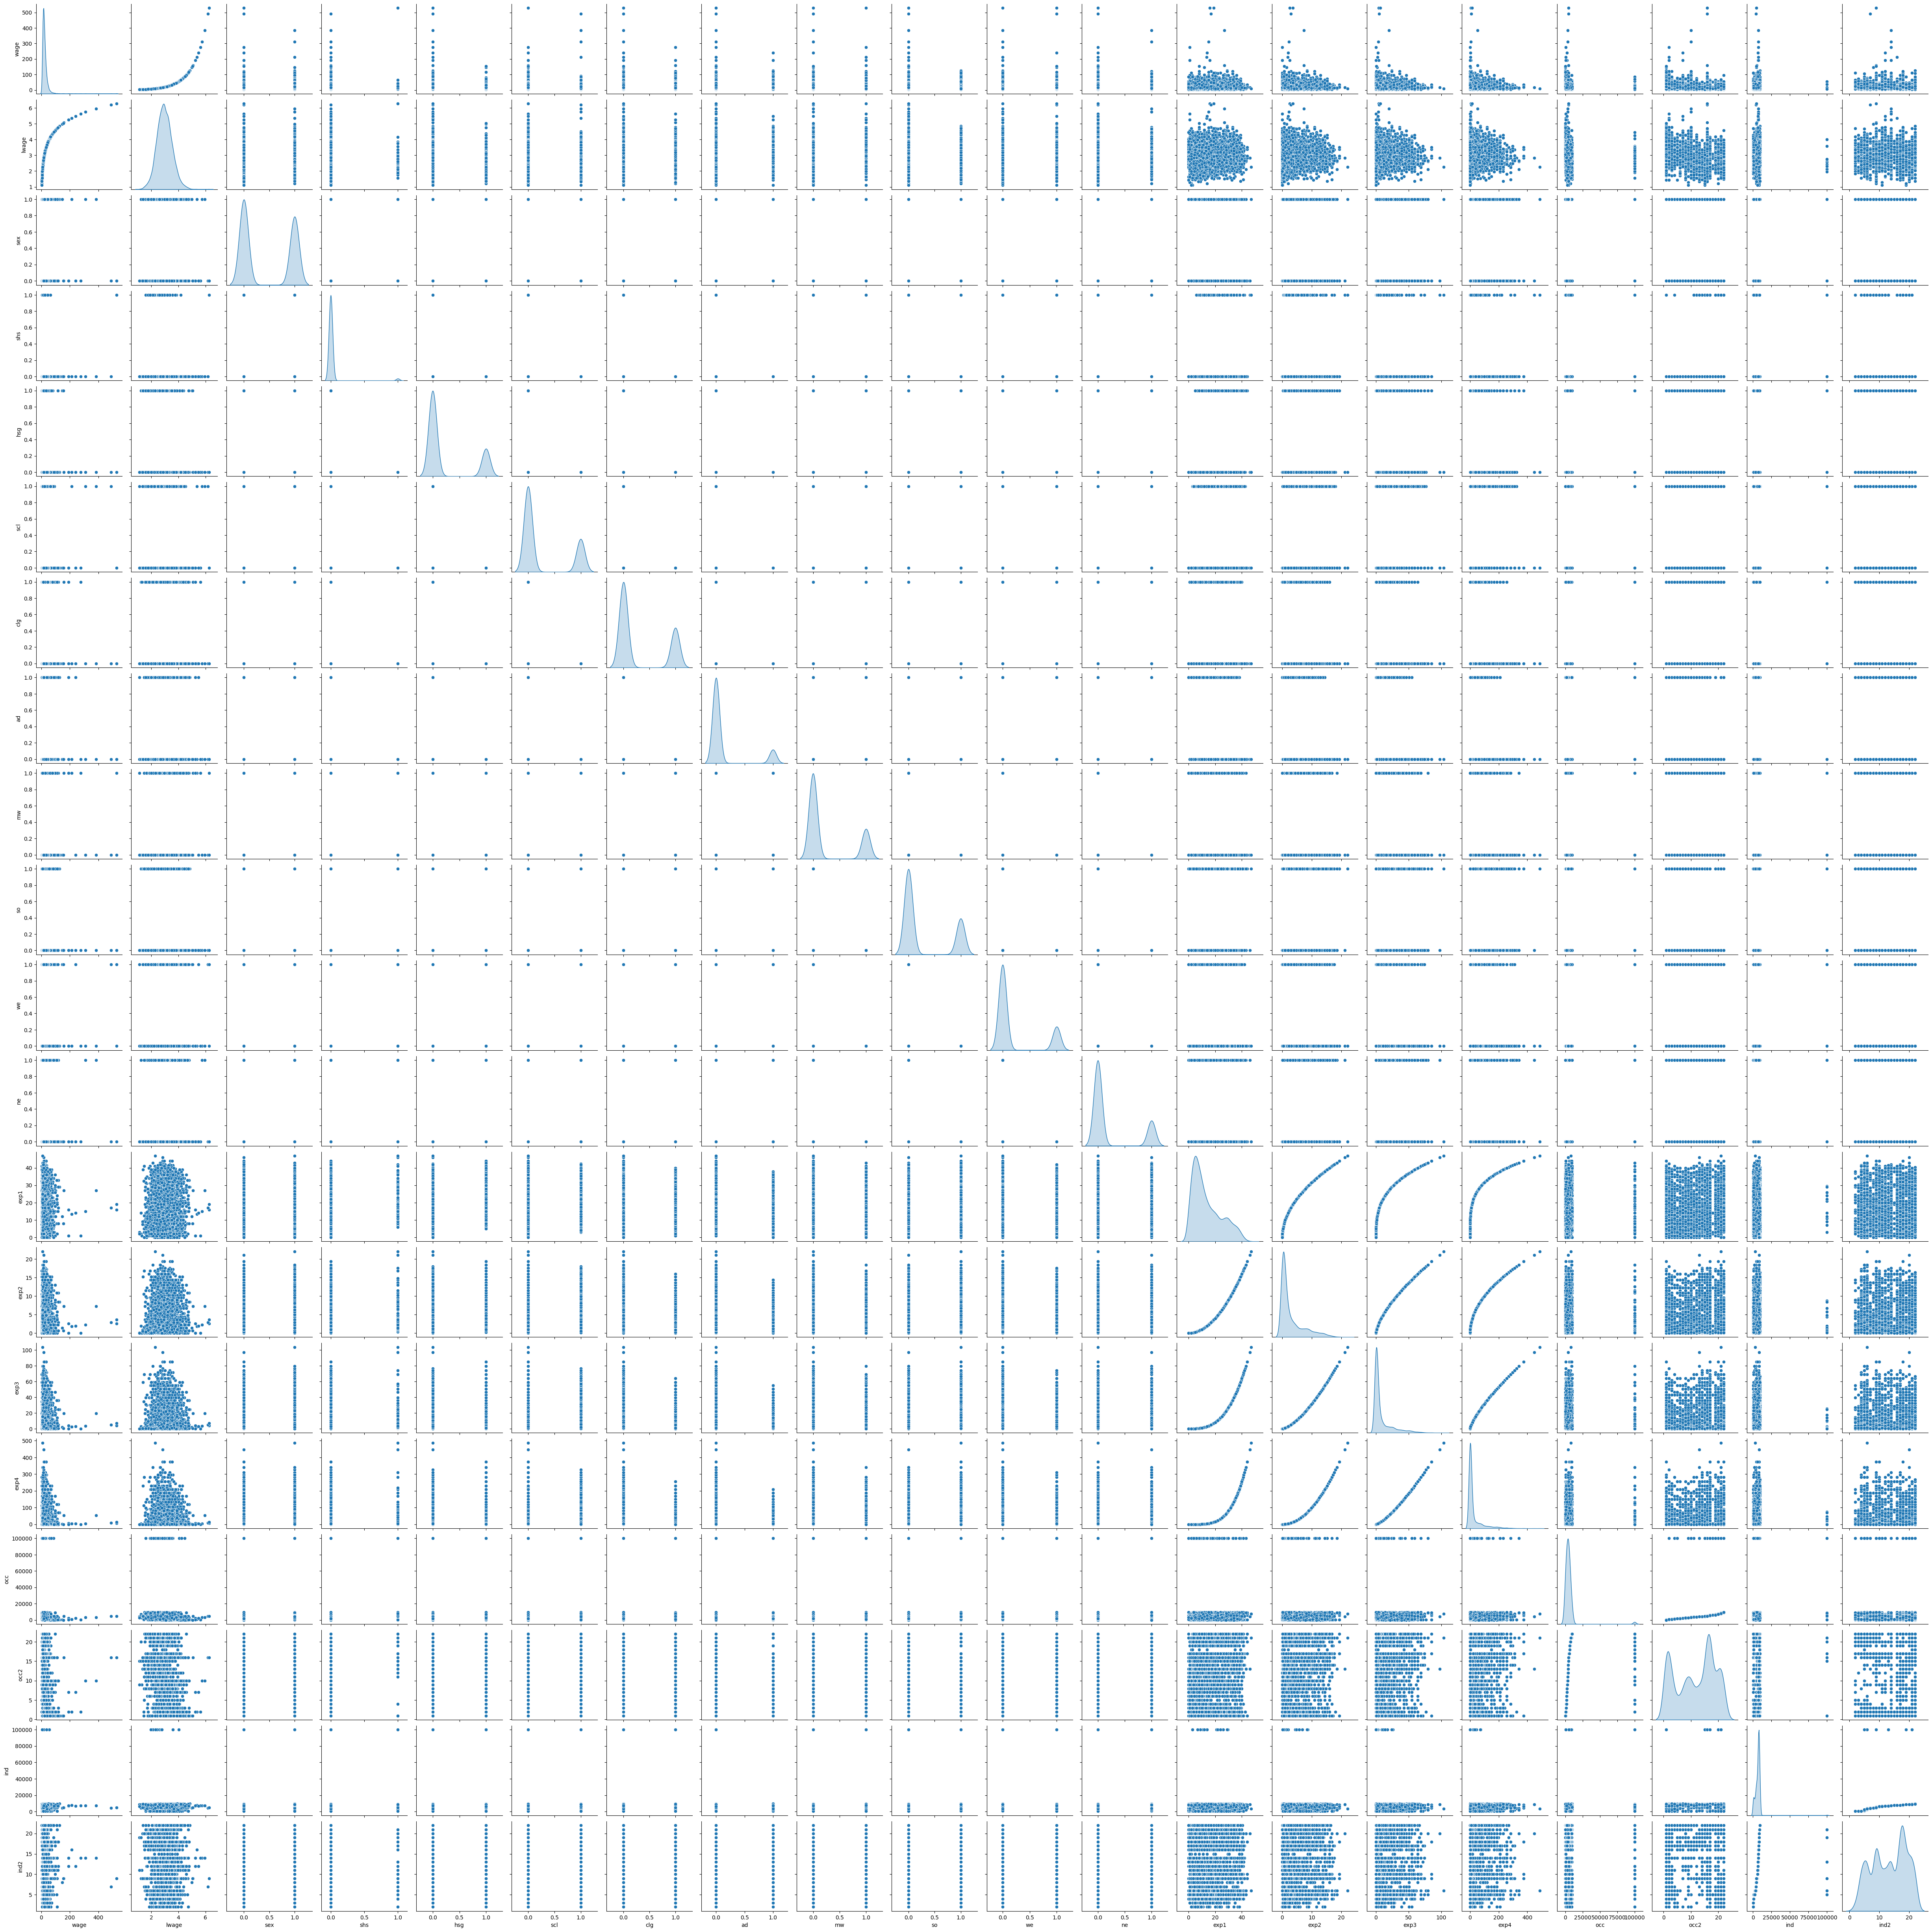

In [10]:
sns.pairplot(df, diag_kind="kde", palette="coolwarm")  #create a pairplot using seaborn
plt.show()  #display the pairplot

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the experience variables
experience_data = df[['exp1', 'exp2', 'exp3', 'exp4']]
scaler = StandardScaler()
experience_scaled = scaler.fit_transform(experience_data)
pca = PCA(n_components=1)  # Keep 1 component (or more if needed)
df['experience'] = pca.fit_transform(experience_scaled)

In [12]:
pca.components_

array([[0.48486334, 0.51099715, 0.50866609, 0.49502349]])

In [13]:
print(df['experience'])

0      -1.139228
1       3.008455
2       0.002386
3       1.314818
4       0.678236
          ...   
5145   -0.989542
5146   -0.723769
5147   -0.818429
5148   -0.906872
5149   -0.513913
Name: experience, Length: 5150, dtype: float64


Remove the wage and lwage column from Z as they are highly correlated

In [14]:
y_wage = np.log(df['wage']).values
y_lwage = np.log(df['lwage']).values
Z = df.drop(['wage', 'lwage'], axis=1)

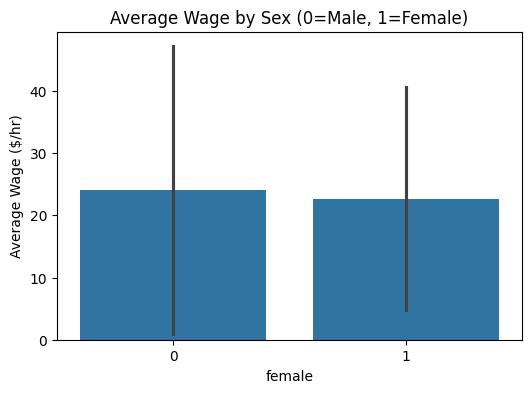

In [54]:
# Check how 'sex' is coded
df['sex'].value_counts()

# Optional: Rename 'sex' to 'female' if 1 = female for clarity
df['female'] = df['sex']  # Use consistently from now on

# Visualize wage by sex
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.barplot(data=df, x='female', y='wage', ci='sd')
plt.title('Average Wage by Sex (0=Male, 1=Female)')
plt.ylabel('Average Wage ($/hr)')
plt.show()


In [15]:
df.describe()

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,...,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2,experience
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,...,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5.150000e+03
mean,23.410410,2.970787,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,...,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893,-1.379695e-17
std,21.003016,0.570385,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,...,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019,1.950303e+00
min,3.021978,1.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000,-1.536018e+00
25%,13.461538,2.599837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000,-1.270591e+00
50%,19.230769,2.956512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000,-9.068719e-01
75%,27.777778,3.324236,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000,4.921216e-01
max,528.845673,6.270697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000,1.159199e+01


In [55]:
# Simple unadjusted wage gap
gap = df[df['female']==0]['wage'].mean() - df[df['female']==1]['wage'].mean()
print(f"Unadjusted gender wage gap: ${gap:.2f} per hour")

Unadjusted gender wage gap: $1.37 per hour


## Built a flexible design matrix with pairwise interactions and sex-specific interactions

This code uses patsy.dmatrix to construct a design matrix (X) with a highly flexible set of control variables, including pairwise interactions between many covariates and additional interactions with the sex variable (likely the treatment or a key variable of interest).

1. (shs + hsg + scl + clg + C(occ2) + C(ind2) + mw + so + we + exp1 + exp2 + exp3 + exp4)**2:

- This generates all pairwise interactions (second-order polynomials) between the listed variables.

- C(occ2) and C(ind2) treat occ2 (occupation category) and ind2 (industry category) as categorical variables (dummy encoding).

- The **2 operator means:

    - All main (linear) terms (e.g., shs, hsg, exp1, mw, etc.)

    - All possible two-way interactions (e.g., shs:hsg, clg:exp1, mw:exp2, C(occ2)[T.2]:C(ind2)[T.3], etc.)

This part alone creates ~1,000 variables (as mentioned in the comment) due to the combinatorial explosion of interactions.

2. + sex + sex:(shs + hsg + scl + clg + mw + so + we + exp1 + exp2 + exp3 + exp4)
- Adds the main effect of sex (likely a binary gender indicator).

- Adds interactions between sex and a subset of variables:

    - Education dummies (shs, hsg, scl, clg)

    - Region dummies (mw, so, we)

    - Experience terms (exp1, exp2, exp3, exp4)

- This allows the effect of sex to vary flexibly across education levels, regions, and experience.

In [16]:
# Formula to specify interactions
formula = '0 + (shs + hsg + scl + clg + C(occ2) + C(ind2) + mw + so + we + experience)**2 + sex + sex:(shs + hsg + scl + clg + mw + so + we + experience)'

# Generate the design matrix using patsy
X = patsy.dmatrix(formula, Z, return_type='dataframe')


In [17]:
X.head()

,C(occ2)[1],C(occ2)[2],C(occ2)[3],C(occ2)[4],C(occ2)[5],C(occ2)[6],C(occ2)[7],C(occ2)[8],C(occ2)[9],C(occ2)[10],...,we:experience,sex,sex:shs,sex:hsg,sex:scl,sex:clg,sex:mw,sex:so,sex:we,sex:experience
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.139228
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.314818
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.678236


In [18]:
from sklearn.linear_model import LassoCV
lasso_model = LassoCV(cv=5, max_iter=10000).fit(X, y_wage)


In [19]:
from sklearn.linear_model import RidgeCV
ridge_model = RidgeCV(cv=5).fit(X, y_wage)


In [20]:
from sklearn.linear_model import ElasticNetCV
elastic_net_model = ElasticNetCV(cv=5).fit(X, y_wage)


(n_targets, n_features)

In [21]:
X_no_sex = X.drop(columns=['sex'])  # Drop the 'sex' column explicitly
lasso_treatment = LassoCV(cv=5).fit(X_no_sex, Z['sex'])

# Check dimensions of lasso_treatment.coef_ and X_no_sex
print(f"Shape of X_no_sex: {X_no_sex.shape}")
print(f"Length of lasso_treatment.coef_: {len(lasso_treatment.coef_)}")

Shape of X_no_sex: (5150, 834)
Length of lasso_treatment.coef_: 834


In [22]:
# Select the variables with non-zero coefficients
selected_treatment_vars = X_no_sex.columns[lasso_treatment.coef_ != 0]

# Check selected treatment variables
print(f"Selected treatment variables: {selected_treatment_vars}")

Selected treatment variables: Index(['C(occ2)[1]', 'C(occ2)[2]', 'C(occ2)[3]', 'C(occ2)[4]', 'C(occ2)[6]',
       'C(occ2)[7]', 'C(occ2)[8]', 'C(occ2)[10]', 'C(occ2)[11]', 'C(occ2)[12]',
       ...
       'so:experience', 'we:experience', 'sex:shs', 'sex:hsg', 'sex:scl',
       'sex:clg', 'sex:mw', 'sex:so', 'sex:we', 'sex:experience'],
      dtype='object', length=286)


In [23]:
# Use the selected treatment variables for outcome prediction
lasso_outcome = LassoCV(cv=5).fit(X[selected_treatment_vars], y_wage)

# Select the outcome variables with non-zero coefficients
selected_outcome_vars = X[selected_treatment_vars].columns[lasso_outcome.coef_ != 0]

# Check selected outcome variables
print(f"Selected outcome variables: {selected_outcome_vars}")

# Double Lasso model
# Final regression using selected outcome variables
final_model = LinearRegression().fit(X[selected_outcome_vars], y_wage)

# Display the model's coefficients
print(f"Coefficients from the final model: {final_model.coef_}")

Selected outcome variables: Index(['C(occ2)[1]', 'C(occ2)[2]', 'C(occ2)[3]', 'C(occ2)[4]', 'C(occ2)[6]',
       'C(occ2)[7]', 'C(occ2)[8]', 'C(occ2)[10]', 'C(occ2)[11]', 'C(occ2)[13]',
       'C(occ2)[14]', 'C(occ2)[17]', 'C(occ2)[19]', 'C(occ2)[20]',
       'C(occ2)[22]', 'C(ind2)[T.9]', 'C(ind2)[T.11]', 'C(ind2)[T.12]',
       'C(ind2)[T.13]', 'C(ind2)[T.14]', 'C(ind2)[T.16]', 'C(ind2)[T.17]',
       'C(ind2)[T.18]', 'C(ind2)[T.19]', 'C(ind2)[T.21]', 'C(ind2)[T.22]',
       'C(occ2)[T.16]:C(ind2)[T.7]', 'C(occ2)[T.17]:C(ind2)[T.12]',
       'C(occ2)[T.9]:C(ind2)[T.14]', 'C(occ2)[T.17]:C(ind2)[T.18]',
       'C(occ2)[T.15]:C(ind2)[T.19]', 'shs', 'hsg', 'hsg:C(ind2)[T.6]',
       'hsg:C(ind2)[T.9]', 'hsg:C(ind2)[T.20]', 'hsg:C(ind2)[T.21]', 'scl',
       'scl:C(occ2)[T.15]', 'scl:C(ind2)[T.7]', 'scl:C(ind2)[T.18]',
       'scl:C(ind2)[T.20]', 'clg', 'clg:C(occ2)[T.4]', 'clg:C(occ2)[T.7]',
       'clg:C(occ2)[T.16]', 'clg:C(occ2)[T.17]', 'clg:C(ind2)[T.6]',
       'clg:C(ind2)[T.20]', '

In [24]:
# Lasso for treatment (sex)
X_no_sex = X.drop(columns=['sex'])  # Explicitly drop 'sex' column
lasso_treatment = LassoCV(cv=5).fit(X_no_sex, Z['sex'])  # Fit Lasso for treatment (sex)

# Select variables with non-zero coefficients for treatment
selected_treatment_vars = X_no_sex.columns[lasso_treatment.coef_ != 0]
# Lasso for outcome (wage or lwage)
# Now we use the selected treatment variables for outcome prediction
lasso_outcome = LassoCV(cv=5).fit(X[selected_treatment_vars], y_wage)

# Select outcome variables with non-zero coefficients
selected_outcome_vars = X[selected_treatment_vars].columns[lasso_outcome.coef_ != 0]

# Double Lasso model
# Fit the final linear regression model with the selected outcome variables
final_model = LinearRegression().fit(X[selected_outcome_vars], y_wage)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Predictions
pred_lasso = lasso_model.predict(X)
pred_ridge = ridge_model.predict(X)
pred_enet = elastic_net_model.predict(X)
pred_double_lasso = final_model.predict(X[selected_outcome_vars])

def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  # MAPE in %
    return {
        'Model': model_name,
        'R²': r2,
        'MAE': mae,
        'RMSE': rmse,
        'MAPE (%)': mape
    }

# Evaluate all models
results = [
    evaluate_model(y_wage, pred_lasso, "Lasso"),
    evaluate_model(y_wage, pred_ridge, "Ridge"),
    evaluate_model(y_wage, pred_enet, "ElasticNet"),
    evaluate_model(y_wage, pred_double_lasso, "Double Lasso")
]

# Display as DataFrame
results_df = pd.DataFrame(results)
print(results_df.set_index('Model'))

                    R²       MAE      RMSE   MAPE (%)
Model                                                
Lasso         0.308518  0.357715  0.474260  12.813360
Ridge         0.380314  0.339024  0.448964  12.122166
ElasticNet    0.310084  0.357360  0.473722  12.800661
Double Lasso  0.322412  0.354201  0.469471  12.674332


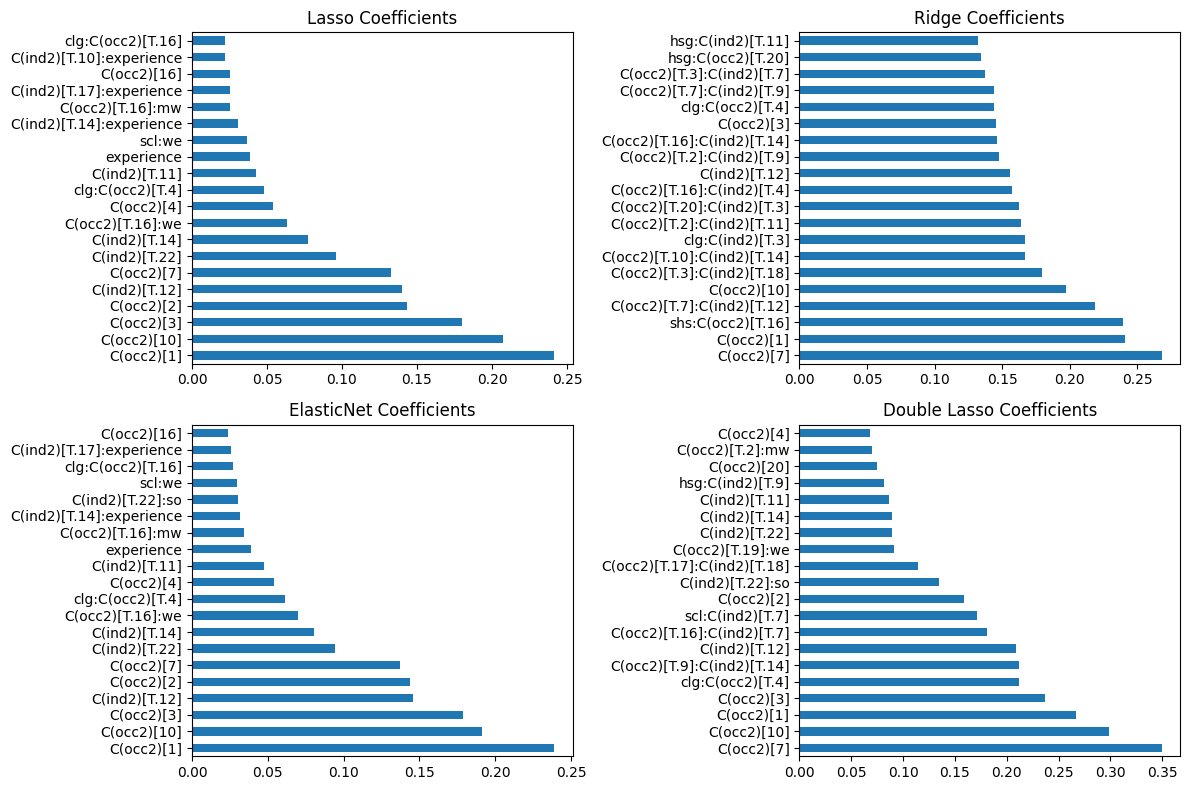

In [26]:
import matplotlib.pyplot as plt

# Extract coefficients for each model
lasso_coefs = pd.Series(lasso_model.coef_, index=X.columns)
ridge_coefs = pd.Series(ridge_model.coef_, index=X.columns)
enet_coefs = pd.Series(elastic_net_model.coef_, index=X.columns)
double_lasso_coefs = pd.Series(final_model.coef_, index=X[selected_outcome_vars].columns)

# Plot coefficients
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
lasso_coefs.sort_values(ascending=False).head(20).plot(kind='barh')
plt.title('Lasso Coefficients')

plt.subplot(2, 2, 2)
ridge_coefs.sort_values(ascending=False).head(20).plot(kind='barh')
plt.title('Ridge Coefficients')

plt.subplot(2, 2, 3)
enet_coefs.sort_values(ascending=False).head(20).plot(kind='barh')
plt.title('ElasticNet Coefficients')

plt.subplot(2, 2, 4)
double_lasso_coefs.sort_values(ascending=False).head(20).plot(kind='barh')
plt.title('Double Lasso Coefficients')

plt.tight_layout()
plt.show()


In [27]:
print(df.columns)

Index(['wage', 'lwage', 'sex', 'shs', 'hsg', 'scl', 'clg', 'ad', 'mw', 'so',
       'we', 'ne', 'exp1', 'exp2', 'exp3', 'exp4', 'occ', 'occ2', 'ind',
       'ind2', 'experience'],
      dtype='object')


In [28]:
df.describe()

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,...,ne,exp1,exp2,exp3,exp4,occ,occ2,ind,ind2,experience
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,...,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5.150000e+03
mean,23.410410,2.970787,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,...,0.227767,13.760583,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893,-1.379695e-17
std,21.003016,0.570385,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,...,0.419432,10.609465,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019,1.950303e+00
min,3.021978,1.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000,-1.536018e+00
25%,13.461538,2.599837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,5.000000,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000,-1.270591e+00
50%,19.230769,2.956512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,10.000000,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000,-9.068719e-01
75%,27.777778,3.324236,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,21.000000,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000,4.921216e-01
max,528.845673,6.270697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,47.000000,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000,1.159199e+01


In [29]:
df['education'] = (
    1 * df['shs'] +
    2 * df['hsg'] +
    3 * df['scl'] +
    4 * df['clg'] +
    5 * df['ad']
)

# Combine industry-related columns
df['industry'] = df[['ind', 'ind2']].sum(axis=1)

# Assuming mw (Midwest), so (South), we (West), ne (NorthEast) are the region indicators:
df['region'] = 'Other'  # Default to "Other" if no region is specified

# Assign regions based on indicators
df.loc[df['mw'] == 1, 'region'] = 'Midwest'
df.loc[df['so'] == 1, 'region'] = 'South'
df.loc[df['we'] == 1, 'region'] = 'West'
df.loc[df['ne'] == 1, 'region'] = 'NorthEast'

# Create a new 'occupation' variable combining 'occ' and 'occ2'
df['occupation'] = 'Other'  # Default to "Other" if no occupation is specified

# Assign occupation categories based on occ and occ2 indicators
df.loc[df['occ'] == 1, 'occupation'] = 'Occupation1'
df.loc[df['occ2'] == 1, 'occupation'] = 'Occupation2'



In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wage        5150 non-null   float64
 1   lwage       5150 non-null   float64
 2   sex         5150 non-null   int64  
 3   shs         5150 non-null   int64  
 4   hsg         5150 non-null   int64  
 5   scl         5150 non-null   int64  
 6   clg         5150 non-null   int64  
 7   ad          5150 non-null   int64  
 8   mw          5150 non-null   int64  
 9   so          5150 non-null   int64  
 10  we          5150 non-null   int64  
 11  ne          5150 non-null   int64  
 12  exp1        5150 non-null   float64
 13  exp2        5150 non-null   float64
 14  exp3        5150 non-null   float64
 15  exp4        5150 non-null   float64
 16  occ         5150 non-null   float64
 17  occ2        5150 non-null   int64  
 18  ind         5150 non-null   float64
 19  ind2        5150 non-null  

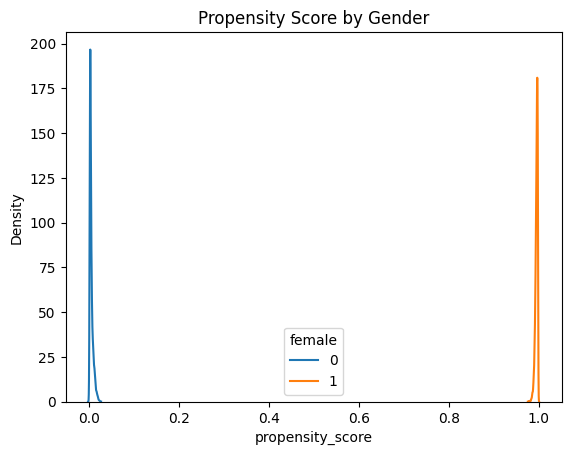

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

X_ps = Z.copy()  # All covariates
y_ps = df['female']

ps_model = LogisticRegression(max_iter=1000)
ps_model.fit(X_ps, y_ps)

df['propensity_score'] = ps_model.predict_proba(X_ps)[:,1]

# Visualize propensity score distribution
sns.kdeplot(data=df, x='propensity_score', hue='female', common_norm=False)
plt.title('Propensity Score by Gender')
plt.show()


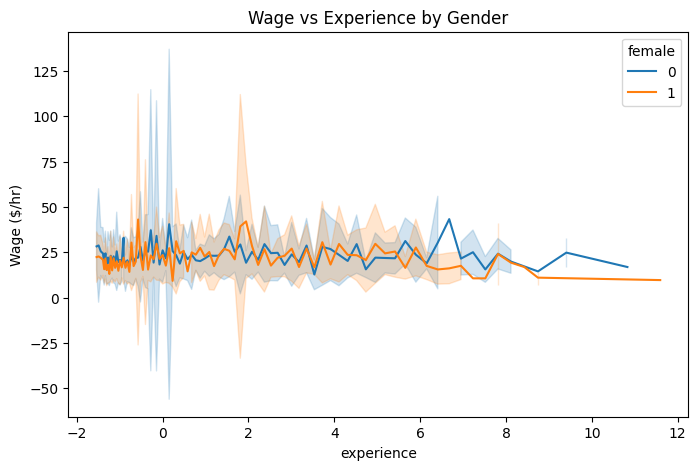

In [58]:
plt.figure(figsize=(8,5))
sns.lineplot(data=df, x='experience', y='wage', hue='female', ci='sd')
plt.title('Wage vs Experience by Gender')
plt.ylabel('Wage ($/hr)')
plt.show()

In [57]:
# IPW estimator: weighted average difference
df['ipw_weight'] = 1 / df['propensity_score']
df['ipw_weight'] = np.where(df['female']==0, 1 / (1 - df['propensity_score']), df['ipw_weight'])

treated = df[df['female']==1]
control = df[df['female']==0]

ipw_treated_mean = np.average(treated['wage'], weights=treated['ipw_weight'])
ipw_control_mean = np.average(control['wage'], weights=control['ipw_weight'])

ipw_gap = ipw_treated_mean - ipw_control_mean
print(f"IPW-estimated average treatment effect (female - male): ${ipw_gap:.2f}")


IPW-estimated average treatment effect (female - male): $-1.40


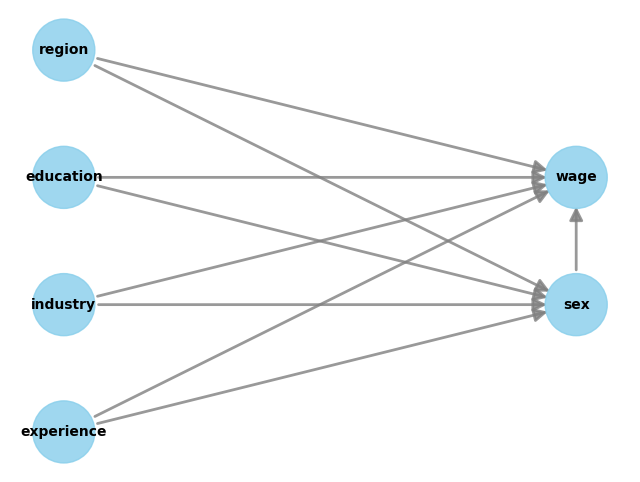

In [31]:
from dowhy import CausalModel

model = CausalModel(
    data=df,
    treatment="sex",
    outcome="wage",
    common_causes=['education', 'experience', 'industry', 'region']
)

model.view_model()


In [32]:
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression")

print("Causal Estimate:", estimate.value)


Causal Estimate: -3.0720740221820293


In [33]:
res_placebo = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter")
print(res_placebo)


Refute: Use a Placebo Treatment
Estimated effect:-3.0720740221820293
New effect:-0.056581026680135905
p value:0.92



ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...


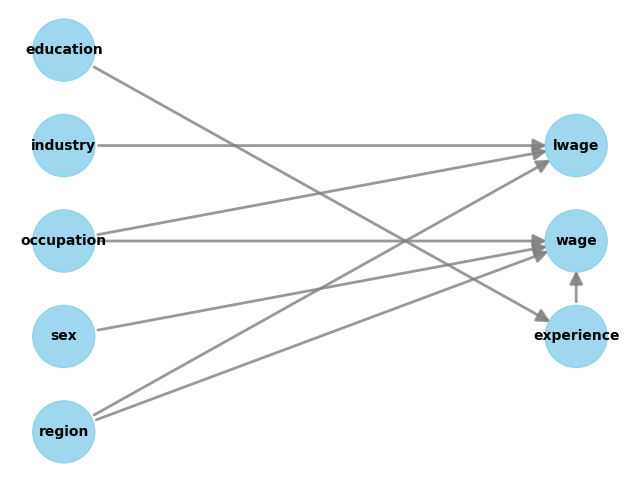

In [34]:
causal_graph = """
digraph {
    education; experience; industry; lwage; sex; wage; region; occupation;
    education -> experience;
    experience -> wage;
    industry -> lwage;
    sex -> wage;
    region -> wage;
    region -> lwage;
    occupation -> wage;
    occupation -> lwage;
}
"""

# Create the DoWhy causal model with the updated graph
cm = dowhy.CausalModel(data=df,
                       treatment='sex',
                       outcome='wage',
                       graph=causal_graph)

# Visualize the updated causal model
cm.view_model(file_name='updated_dag_with_occupation')


# New code

In [35]:
# Formula to specify interactions
formula = '0 + (shs + hsg + scl + clg + C(occ2) + C(ind2) + mw + so + we + experience) + sex + sex:(shs + hsg + scl + clg + mw + so + we + experience)'

# Generate the design matrix using patsy
X = patsy.dmatrix(formula, Z, return_type='dataframe')


In [36]:
X.head()

,C(occ2)[1],C(occ2)[2],C(occ2)[3],C(occ2)[4],C(occ2)[5],C(occ2)[6],C(occ2)[7],C(occ2)[8],C(occ2)[9],C(occ2)[10],...,experience,sex,sex:shs,sex:hsg,sex:scl,sex:clg,sex:mw,sex:so,sex:we,sex:experience
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.139228,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.139228
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,3.008455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.002386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.314818,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.314818
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.678236,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.678236


In [37]:
from sklearn.linear_model import LassoCV
lasso_model = LassoCV(cv=5, max_iter=10000).fit(X, y_wage)


In [38]:
from sklearn.linear_model import RidgeCV
ridge_model = RidgeCV(cv=5).fit(X, y_wage)


In [39]:
from sklearn.linear_model import ElasticNetCV
elastic_net_model = ElasticNetCV(cv=5).fit(X, y_wage)


(n_targets, n_features)

In [40]:
X_no_sex = X.drop(columns=['sex'])  # Drop the 'sex' column explicitly
lasso_treatment = LassoCV(cv=5).fit(X_no_sex, Z['sex'])

# Check dimensions of lasso_treatment.coef_ and X_no_sex
print(f"Shape of X_no_sex: {X_no_sex.shape}")
print(f"Length of lasso_treatment.coef_: {len(lasso_treatment.coef_)}")

Shape of X_no_sex: (5150, 58)
Length of lasso_treatment.coef_: 58


In [41]:
# Select the variables with non-zero coefficients
selected_treatment_vars = X_no_sex.columns[lasso_treatment.coef_ != 0]

# Check selected treatment variables
print(f"Selected treatment variables: {selected_treatment_vars}")

Selected treatment variables: Index(['C(occ2)[1]', 'C(occ2)[2]', 'C(occ2)[3]', 'C(occ2)[4]', 'C(occ2)[5]',
       'C(occ2)[6]', 'C(occ2)[7]', 'C(occ2)[8]', 'C(occ2)[9]', 'C(occ2)[10]',
       'C(occ2)[11]', 'C(occ2)[12]', 'C(occ2)[13]', 'C(occ2)[14]',
       'C(occ2)[15]', 'C(occ2)[17]', 'C(occ2)[19]', 'C(occ2)[22]',
       'C(ind2)[T.3]', 'C(ind2)[T.5]', 'C(ind2)[T.7]', 'C(ind2)[T.8]',
       'C(ind2)[T.9]', 'C(ind2)[T.10]', 'C(ind2)[T.11]', 'C(ind2)[T.12]',
       'C(ind2)[T.13]', 'C(ind2)[T.14]', 'C(ind2)[T.17]', 'C(ind2)[T.18]',
       'C(ind2)[T.21]', 'C(ind2)[T.22]', 'shs', 'hsg', 'scl', 'clg', 'mw',
       'so', 'we', 'experience', 'sex:shs', 'sex:hsg', 'sex:scl', 'sex:clg',
       'sex:mw', 'sex:so', 'sex:we', 'sex:experience'],
      dtype='object')


In [42]:
# Use the selected treatment variables for outcome prediction
lasso_outcome = LassoCV(cv=5).fit(X[selected_treatment_vars], y_wage)

# Select the outcome variables with non-zero coefficients
selected_outcome_vars = X[selected_treatment_vars].columns[lasso_outcome.coef_ != 0]

# Check selected outcome variables
print(f"Selected outcome variables: {selected_outcome_vars}")

# Double Lasso model
# Final regression using selected outcome variables
final_model = LinearRegression().fit(X[selected_outcome_vars], y_wage)

# Display the model's coefficients
print(f"Coefficients from the final model: {final_model.coef_}")

Selected outcome variables: Index(['C(occ2)[1]', 'C(occ2)[2]', 'C(occ2)[3]', 'C(occ2)[4]', 'C(occ2)[6]',
       'C(occ2)[7]', 'C(occ2)[8]', 'C(occ2)[10]', 'C(occ2)[11]', 'C(occ2)[13]',
       'C(occ2)[14]', 'C(occ2)[15]', 'C(occ2)[17]', 'C(occ2)[19]',
       'C(occ2)[22]', 'C(ind2)[T.3]', 'C(ind2)[T.7]', 'C(ind2)[T.9]',
       'C(ind2)[T.10]', 'C(ind2)[T.11]', 'C(ind2)[T.12]', 'C(ind2)[T.13]',
       'C(ind2)[T.14]', 'C(ind2)[T.18]', 'C(ind2)[T.22]', 'shs', 'hsg', 'scl',
       'clg', 'so', 'we', 'experience', 'sex:hsg', 'sex:scl', 'sex:clg',
       'sex:mw', 'sex:so', 'sex:we', 'sex:experience'],
      dtype='object')
Coefficients from the final model: [ 0.20447753  0.15179391  0.20285313  0.16777238 -0.20089134  0.18385585
 -0.15592029  0.20240857 -0.23758538 -0.34167264 -0.30333137 -0.26020804
 -0.18034275  0.06669996 -0.17105301  0.20271493  0.18030563 -0.07594269
  0.11308611  0.15870736  0.23738819  0.1483369   0.12272873 -0.00680872
  0.1824736  -0.57399253 -0.48753134 -0.398063

In [43]:
# Lasso for treatment (sex)
X_no_sex = X.drop(columns=['sex'])  # Explicitly drop 'sex' column
lasso_treatment = LassoCV(cv=5).fit(X_no_sex, Z['sex'])  # Fit Lasso for treatment (sex)

# Select variables with non-zero coefficients for treatment
selected_treatment_vars = X_no_sex.columns[lasso_treatment.coef_ != 0]
# Lasso for outcome (wage or lwage)
# Now we use the selected treatment variables for outcome prediction
lasso_outcome = LassoCV(cv=5).fit(X[selected_treatment_vars], y_wage)

# Select outcome variables with non-zero coefficients
selected_outcome_vars = X[selected_treatment_vars].columns[lasso_outcome.coef_ != 0]

# Double Lasso model
# Fit the final linear regression model with the selected outcome variables
final_model = LinearRegression().fit(X[selected_outcome_vars], y_wage)

In [44]:
from sklearn.metrics import r2_score

# Predictions
pred_lasso = lasso_model.predict(X)
pred_ridge = ridge_model.predict(X)
pred_enet = elastic_net_model.predict(X)
pred_double_lasso = final_model.predict(X[selected_outcome_vars])

# R² scores
r2_lasso = r2_score(y_wage, pred_lasso)
r2_ridge = r2_score(y_wage, pred_ridge)
r2_enet = r2_score(y_wage, pred_enet)
r2_double_lasso = r2_score(y_wage, pred_double_lasso)

# Display R² results
r2_results = {'Lasso': r2_lasso, 'Ridge': r2_ridge, 'ElasticNet': r2_enet, 'Double Lasso': r2_double_lasso}
print(pd.DataFrame.from_dict(r2_results, orient='index', columns=['R-squared']))


              R-squared
Lasso          0.294737
Ridge          0.301882
ElasticNet     0.294746
Double Lasso   0.292639


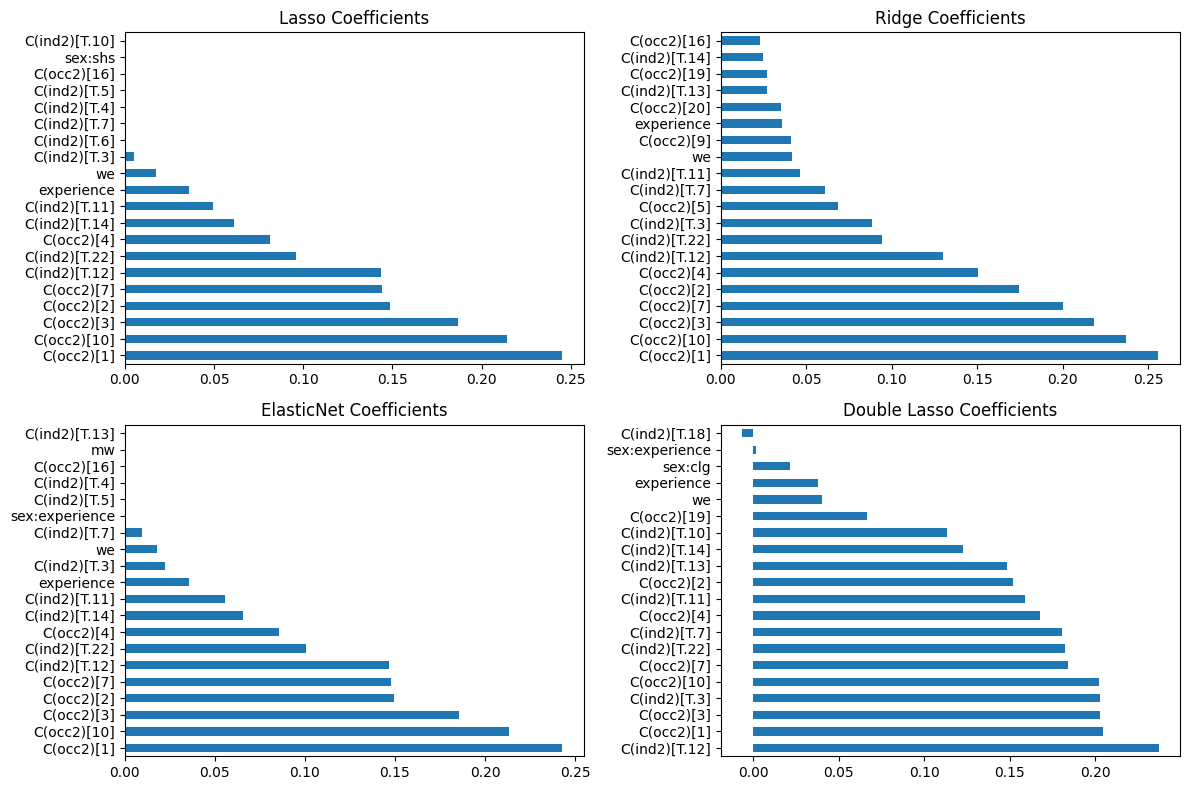

In [45]:
import matplotlib.pyplot as plt

# Extract coefficients for each model
lasso_coefs = pd.Series(lasso_model.coef_, index=X.columns)
ridge_coefs = pd.Series(ridge_model.coef_, index=X.columns)
enet_coefs = pd.Series(elastic_net_model.coef_, index=X.columns)
double_lasso_coefs = pd.Series(final_model.coef_, index=X[selected_outcome_vars].columns)

# Plot coefficients
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
lasso_coefs.sort_values(ascending=False).head(20).plot(kind='barh')
plt.title('Lasso Coefficients')

plt.subplot(2, 2, 2)
ridge_coefs.sort_values(ascending=False).head(20).plot(kind='barh')
plt.title('Ridge Coefficients')

plt.subplot(2, 2, 3)
enet_coefs.sort_values(ascending=False).head(20).plot(kind='barh')
plt.title('ElasticNet Coefficients')

plt.subplot(2, 2, 4)
double_lasso_coefs.sort_values(ascending=False).head(20).plot(kind='barh')
plt.title('Double Lasso Coefficients')

plt.tight_layout()
plt.show()


In [46]:
print(df.columns)

Index(['wage', 'lwage', 'sex', 'shs', 'hsg', 'scl', 'clg', 'ad', 'mw', 'so',
       'we', 'ne', 'exp1', 'exp2', 'exp3', 'exp4', 'occ', 'occ2', 'ind',
       'ind2', 'experience', 'education', 'industry', 'region', 'occupation'],
      dtype='object')


In [47]:
df.describe()

,wage,lwage,sex,shs,hsg,scl,clg,ad,mw,so,...,exp2,exp3,exp4,occ,occ2,ind,ind2,experience,education,industry
count,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,...,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5150.000000,5.150000e+03,5150.000000,5150.000000
mean,23.410410,2.970787,0.444466,0.023301,0.243883,0.278058,0.317670,0.137087,0.259612,0.296505,...,3.018925,8.235867,25.118038,5310.737476,11.670874,6629.154951,13.316893,-1.379695e-17,3.301359,6642.471845
std,21.003016,0.570385,0.496955,0.150872,0.429465,0.448086,0.465616,0.343973,0.438464,0.456761,...,4.000904,14.488962,53.530225,11874.356080,6.966684,5333.443992,5.701019,1.950303e+00,1.054754,5335.914900
min,3.021978,1.105912,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,10.000000,1.000000,370.000000,2.000000,-1.536018e+00,1.000000,372.000000
25%,13.461538,2.599837,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.250000,0.125000,0.062500,1740.000000,5.000000,4880.000000,9.000000,-1.270591e+00,2.000000,4889.000000
50%,19.230769,2.956512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,4040.000000,13.000000,7370.000000,14.000000,-9.068719e-01,3.000000,7384.000000
75%,27.777778,3.324236,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,4.410000,9.261000,19.448100,5610.000000,17.000000,8190.000000,18.000000,4.921216e-01,4.000000,8208.000000
max,528.845673,6.270697,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,22.090000,103.823000,487.968100,100000.000000,22.000000,100000.000000,22.000000,1.159199e+01,5.000000,100021.000000


In [48]:
df['education'] = (
    1 * df['shs'] +
    2 * df['hsg'] +
    3 * df['scl'] +
    4 * df['clg'] +
    5 * df['ad']
)

# Combine industry-related columns
df['industry'] = df[['ind', 'ind2']].sum(axis=1)

# Assuming mw (Midwest), so (South), we (West), ne (NorthEast) are the region indicators:
df['region'] = 'Other'  # Default to "Other" if no region is specified

# Assign regions based on indicators
df.loc[df['mw'] == 1, 'region'] = 'Midwest'
df.loc[df['so'] == 1, 'region'] = 'South'
df.loc[df['we'] == 1, 'region'] = 'West'
df.loc[df['ne'] == 1, 'region'] = 'NorthEast'

# Create a new 'occupation' variable combining 'occ' and 'occ2'
df['occupation'] = 'Other'  # Default to "Other" if no occupation is specified

# Assign occupation categories based on occ and occ2 indicators
df.loc[df['occ'] == 1, 'occupation'] = 'Occupation1'
df.loc[df['occ2'] == 1, 'occupation'] = 'Occupation2'



In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5150 entries, 0 to 5149
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   wage        5150 non-null   float64
 1   lwage       5150 non-null   float64
 2   sex         5150 non-null   int64  
 3   shs         5150 non-null   int64  
 4   hsg         5150 non-null   int64  
 5   scl         5150 non-null   int64  
 6   clg         5150 non-null   int64  
 7   ad          5150 non-null   int64  
 8   mw          5150 non-null   int64  
 9   so          5150 non-null   int64  
 10  we          5150 non-null   int64  
 11  ne          5150 non-null   int64  
 12  exp1        5150 non-null   float64
 13  exp2        5150 non-null   float64
 14  exp3        5150 non-null   float64
 15  exp4        5150 non-null   float64
 16  occ         5150 non-null   float64
 17  occ2        5150 non-null   int64  
 18  ind         5150 non-null   float64
 19  ind2        5150 non-null  

In [59]:
common_causes = Z.columns.tolist()

In [60]:
common_causes

['sex',
 'shs',
 'hsg',
 'scl',
 'clg',
 'ad',
 'mw',
 'so',
 'we',
 'ne',
 'exp1',
 'exp2',
 'exp3',
 'exp4',
 'occ',
 'occ2',
 'ind',
 'ind2',
 'experience']

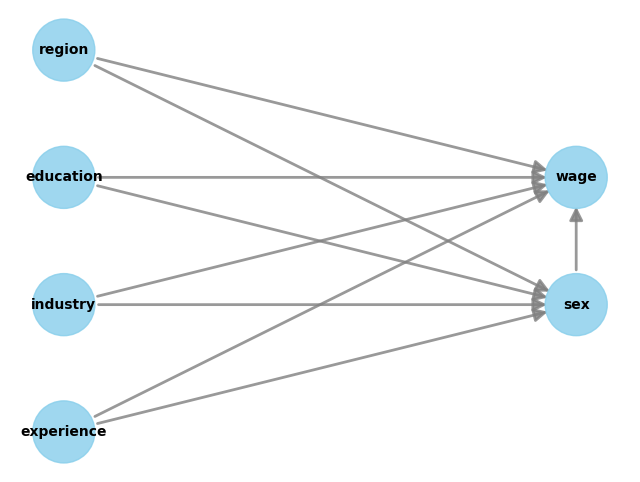

In [50]:
from dowhy import CausalModel

model = CausalModel(
    data=df,
    treatment="sex",
    outcome="wage",
    common_causes=['education', 'experience', 'industry', 'region']
)

model.view_model()


In [62]:
print(model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression").get_confidence_intervals())

[[-4.21038235 -1.9337657 ]]


In [51]:
identified_estimand = model.identify_effect()
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.linear_regression")

print("Causal Estimate:", estimate.value)


Causal Estimate: -3.0720740221820293


In [52]:
res_placebo = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter")
print(res_placebo)


Refute: Use a Placebo Treatment
Estimated effect:-3.0720740221820293
New effect:-0.010827462884780878
p value:0.9

